<a href="https://colab.research.google.com/github/YRYoung/HPC/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def slow_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0.0
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)




Use numba.njit to tell Numba to just-in-time (JIT) compile this function.

In [ ]:
import numpy as np
from numba import njit

@njit()
def fast_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0.0
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
         
        result.append(value)
    return np.array(result)


  

Using matplotlib, make a plot that shows the time this function takes to compute a matrix-vector product with and without Numba acceleration. Add timings for the faster_matvec function that you wrote to this plot.

[ 80. 112. 143. 175. 207. 238. 270. 302. 334. 365. 397. 429. 460. 492.
 524. 555. 587. 619. 650. 682. 714. 745. 777. 809. 841. 872. 904. 936.
 967. 999.]


100%|██████████| 30/30 [00:04<00:00,  7.11it/s]


[complete calculation]


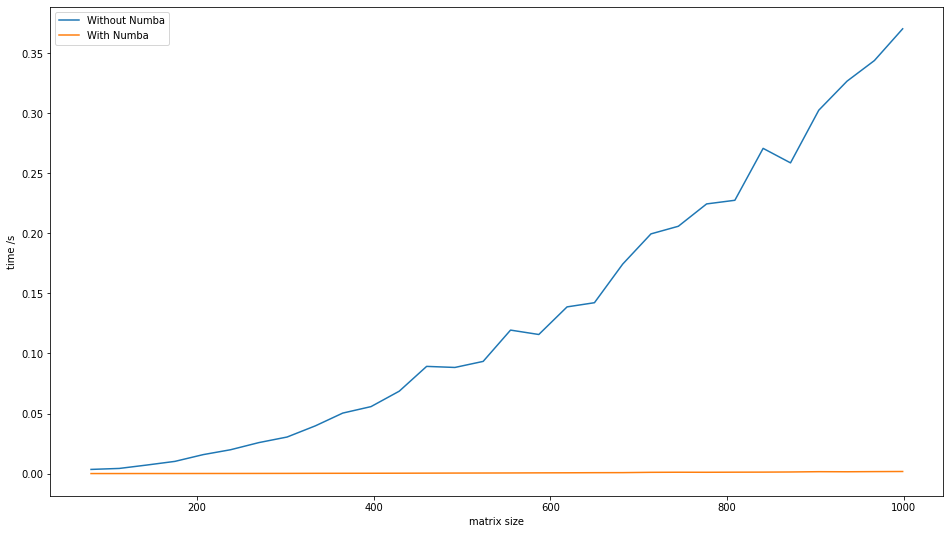

In [ ]:
import timeit
import numpy as np
from tqdm import tqdm

size = 1000
x = np.round(np.linspace(80, size - 1, 30))
print(x)
no_numba_time = []
numba_time = []


number = 1
for i in tqdm(x):
    mat1 = np.random.rand(int(i),int(i))
    mat2 = np.random.rand(int(i))


    # t1 = timeit.Timer(lambda: slow_matvec( mat1,mat2)).timeit(number)
    # t2 = timeit.Timer(lambda: fast_matvec( mat1,mat2)).timeit(number)
    t1 = timeit.Timer("slow_matvec( mat1,mat2)","from __main__ import slow_matvec,mat1,mat2").timeit(number)
    t2 = timeit.Timer("fast_matvec( mat1,mat2)","from __main__ import fast_matvec,mat1,mat2").timeit(number)
   
    
 
    no_numba_time.append(t1 / number)
    numba_time.append(t2 / number)



print('[complete calculation]')

import matplotlib.pylab as plt

plt.figure(figsize=(16, 9))
plt.plot(x, no_numba_time, label="Without Numba")
plt.plot(x, numba_time, label='With Numba')

plt.xlabel("matrix size")
plt.ylabel("time /s")
plt.legend()
plt.show()

Add another line to your plot to show the timings if you use numba.jit instead of numba.njit. Which is faster?

In [ ]:
import numpy as np
from numba import jit

@jit(nopython=False)
def fast_matvec_jit(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0.0
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
         
        result.append(value)
    return np.array(result)


  

[  80.  250.  419.  589.  758.  928. 1098. 1267. 1437. 1607. 1776. 1946.
 2115. 2285. 2455. 2624. 2794. 2964. 3133. 3303. 3472. 3642. 3812. 3981.
 4151. 4321. 4490. 4660. 4829. 4999.]


100%|██████████| 30/30 [01:38<00:00,  3.27s/it]


[complete calculation]


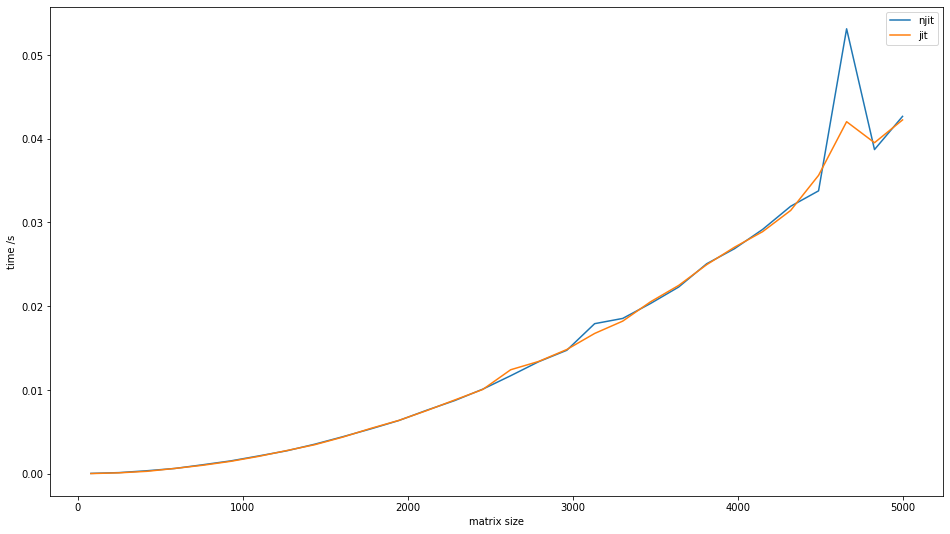

In [ ]:
import timeit
import numpy as np
from tqdm import tqdm

size = 5000
x = np.round(np.linspace(80, size - 1, 30))
print(x)
no_numba_time = []
njit_time = []
jit_time=[]



number = 1
for i in tqdm(x):
    mat1 = np.random.rand(int(i),int(i))
    mat2 = np.random.rand(int(i))


    t1 = timeit.Timer("slow_matvec( mat1,mat2)","from __main__ import slow_matvec,mat1,mat2").timeit(number)
    t2 = timeit.Timer("fast_matvec( mat1,mat2)","from __main__ import fast_matvec,mat1,mat2").timeit(number)
    t3 = timeit.Timer("fast_matvec_jit( mat1,mat2)","from __main__ import fast_matvec_jit,mat1,mat2").timeit(number)
   
 
    no_numba_time.append(t1 / number)
    njit_time.append(t2 / number)
    jit_time.append(t3 / number)



print('[complete calculation]')

import matplotlib.pylab as plt

plt.figure(figsize=(16, 9))
# plt.plot(x, no_numba_time, label="Without Numba")
plt.plot(x, njit_time, label='njit')
plt.plot(x, jit_time, label='jit')



plt.xlabel("matrix size")
plt.ylabel("time /s")
plt.legend()
plt.show()

Replace any ranges in your function with <b>numba.prange</b>: this will make your function use a parallel for loop. Compare the timings of your function with and without parellel ranges. 

In [ ]:
import numpy as np
from numba import njit,prange

@njit()
def fast_matvec_prange(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in prange(matrix.shape[0]):
        value = 0.0
        for c in prange(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
         
        result.append(value)
    return np.array(result)

[  80.  422.  764. 1106. 1448. 1790. 2132. 2474. 2816. 3158. 3500. 3842.
 4184. 4526. 4868. 5211. 5553. 5895. 6237. 6579. 6921. 7263. 7605. 7947.
 8289. 8631. 8973. 9315. 9657. 9999.]


100%|██████████| 30/30 [00:14<00:00,  2.12it/s]


[complete calculation]


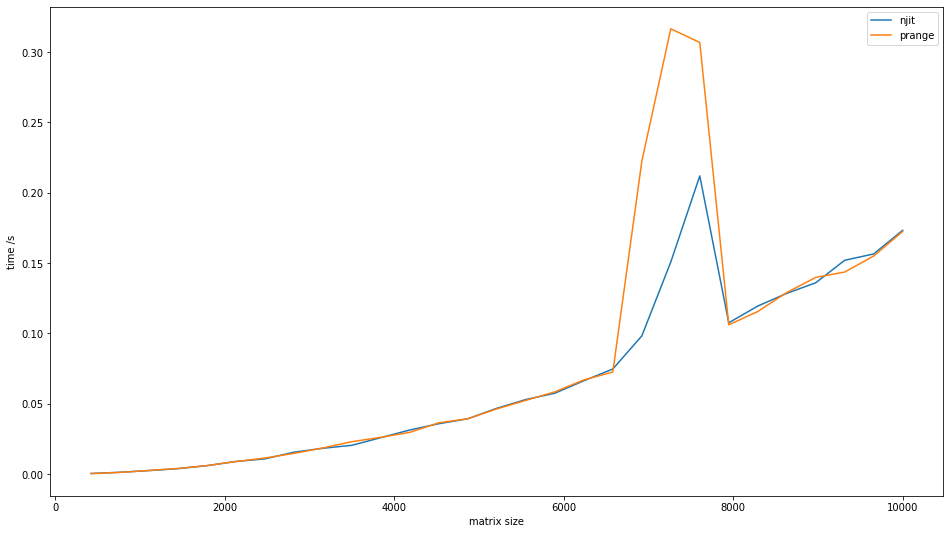

In [ ]:
import timeit
import numpy as np
from tqdm import tqdm

size = 10000
x = np.round(np.linspace(80, size - 1, 30))
print(x)
njit_time = []
prange_time=[]



number = 1
for i in tqdm(x):
    mat1 = np.random.rand(int(i),int(i))
    mat2 = np.random.rand(int(i))


    t1 = timeit.Timer("fast_matvec( mat1,mat2)","from __main__ import fast_matvec,mat1,mat2").timeit(number)
    t2 = timeit.Timer("fast_matvec_prange( mat1,mat2)","from __main__ import fast_matvec_prange,mat1,mat2").timeit(number)

   
 
    njit_time.append(t1 / number)
    prange_time.append(t2 / number)
    



print('[complete calculation]')

import matplotlib.pylab as plt

plt.figure(figsize=(16, 9))
# plt.plot(x, no_numba_time, label="Without Numba")
plt.plot(x[1:], njit_time[1:], label='njit')
plt.plot(x[1:], prange_time[1:], label='prange')



plt.xlabel("matrix size")
plt.ylabel("time /s")
plt.legend()
plt.show()